In [2]:
import os
import sys
import numpy as np
import pandas as pd
import pylab
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.cross_validation import  cross_val_score
from sklearn.grid_search import GridSearchCV

In [3]:
iris = load_iris ()
X = iris.data
y = iris.target
range(0,3)

[0, 1, 2]

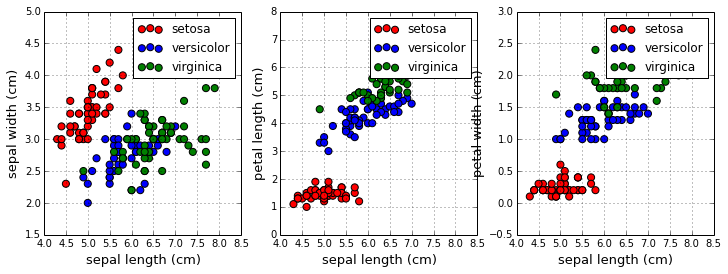

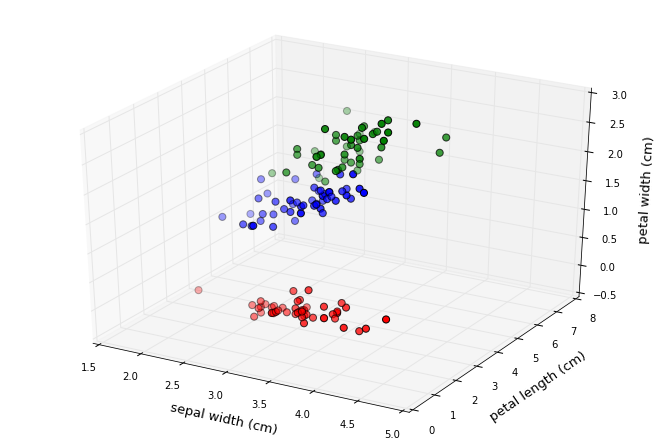

In [4]:
get_ipython().magic(u'matplotlib inline')
plt.figure(figsize=(12,4))
ax = plt.subplot(1,3,1)
colors = ('r','b','g')
for i in range(0,3):
    ax.scatter(X[np.where(y==i),0], X[np.where(y==i),1], c=colors[i],marker='o',s=50,label = iris.target_names[i])
plt.grid()
plt.xlabel(iris.feature_names[0],fontsize=13)
plt.ylabel(iris.feature_names[1],fontsize=13)
plt.legend()
#plt.title(iris.feature_names[1],'versus',iris.feature_names[0],fontsize=15)

ax = plt.subplot(1,3,2)
for i in range(0,3):
    plt.scatter(X[np.where(y==i),0], X[np.where(y==i),2], c=colors[i],marker='o',s=50,label = iris.target_names[i])
plt.grid()
plt.xlabel(iris.feature_names[0],fontsize=13)
plt.ylabel(iris.feature_names[2],fontsize=13)
plt.legend()

ax = plt.subplot(1,3,3)
for i in range(0,3):
    plt.scatter(X[np.where(y==i),0], X[np.where(y==i),3], c=colors[i],marker='o',s=50,label = iris.target_names[i])
plt.grid()
plt.xlabel(iris.feature_names[0],fontsize=13)
plt.ylabel(iris.feature_names[3],fontsize=13)
plt.legend()

fig1 = pylab.figure(figsize=(9,6))
ax = Axes3D(fig1)
for i in range(0,3):
    ax.scatter(X[np.where(y==i),1], X[np.where(y==i),2],X[np.where(y==i),3], c=colors[i],marker='o',s=50,label = iris.target_names[i])

ax.set_xlabel(iris.feature_names[1],fontsize=13)
ax.set_ylabel(iris.feature_names[2],fontsize=13)
ax.set_zlabel(iris.feature_names[3],fontsize=13)

In [18]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X[:,0:3:2], y) # o:initial, 3:final, 2: step np.c_[X[:,0],X[:,2]]: concatenate the 2 features

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [19]:
knn_1.predict([[2.0,1.2],[3.0,4.0]])

array([0, 2])

In [20]:
xx,yy = np.meshgrid(np.linspace(0.0,10.0,301),np.linspace(0.0,10.0,301))
predict = knn_1.predict(np.c_[xx.ravel(),yy.ravel()])
Z = predict.reshape(np.shape(xx))

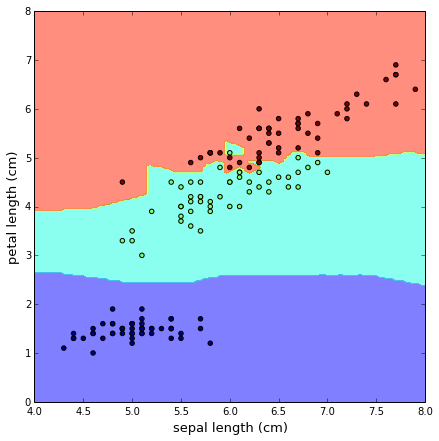

In [21]:
plt.figure(figsize=(7,7))
plt.contourf(xx,yy,Z,3,alpha=0.5)
plt.scatter(X.T[0],X.T[2],c=iris['target'])
plt.xlim(4.0,8.0)
plt.ylim(0.0,8.0)
plt.xlabel(iris.feature_names[0],fontsize=13)
plt.ylabel(iris.feature_names[2],fontsize=13)